In [1]:
# Display the current working directory
getwd();
# If necessary, change the path below to the directory where the data files are stored.
# "." means current directory. On Windows use a forward slash / instead of the usual \.
workingDir = ".";
setwd(workingDir);
# Load the WGCNA package
library(WGCNA)
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE);
# Allow multi-threading within WGCNA. This helps speed up certain calculations.
# At present this call is necessary for the code to work.
# Any error here may be ignored but you may want to update WGCNA if you see one.
# Caution: skip this line if you run RStudio or other third-party R environments.
# See note above.

#enableWGCNAThreads()

# Load the data saved in the first part
lnames = load(file = "WGCNA.dataInput.RData");
#The variable lnames contains the names of loaded variables.
lnames

[1] "/home/hanliu/project/mouse_rostral_brain/study/ITSpatial/DMGAnalysis/WGCNA"

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




[1] "datExpr"

pickSoftThreshold: will use block size 4219.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4219 of 4219
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.1290  0.983          0.867 1330.00  1310.000 2000.0
2      2   0.0686 -0.373          0.843  600.00   559.000 1210.0
3      3   0.4400 -0.870          0.902  321.00   280.000  818.0
4      4   0.6570 -1.160          0.936  190.00   154.000  587.0
5      5   0.7520 -1.330          0.949  120.00    90.200  440.0
6      6   0.8020 -1.430          0.963   80.10    55.600  340.0
7      7   0.8250 -1.510          0.968   55.50    35.600  268.0
8      8   0.8460 -1.560          0.973   39.70    23.600  216.0
9      9   0.8630 -1.590          0.980   29.10    16.000  176.0
10    10   0.8660 -1.630          0.981   21.80    11.200  146.0
11    12   0.8810 -1.660          0.983   13.00     5.860  103.0
12    14   0.8910 -1.700          0.990    8.14     3.290   75.1


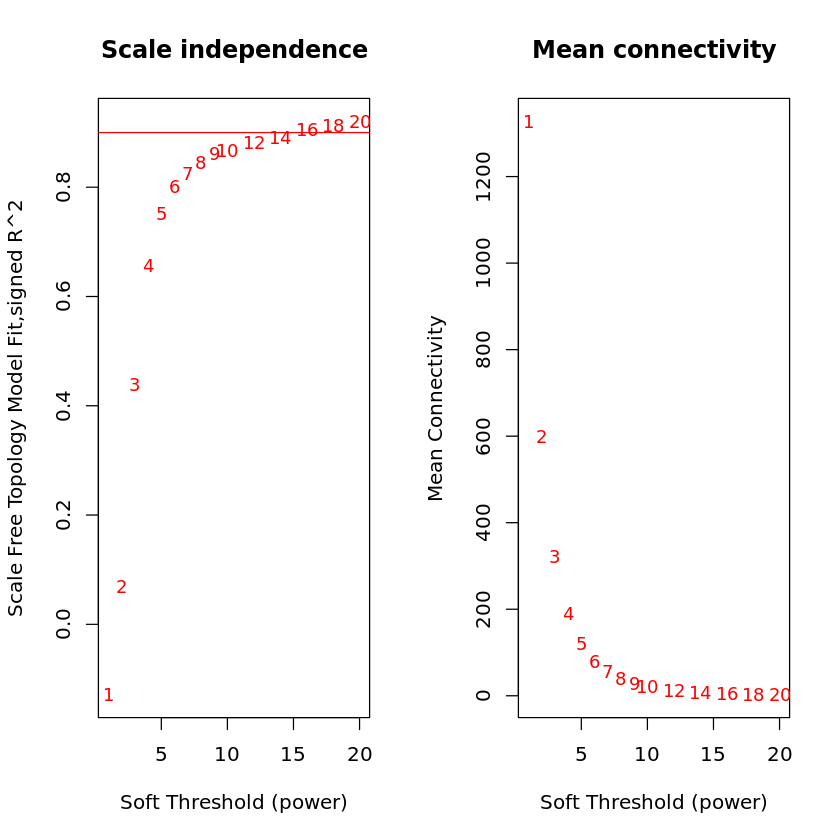

In [7]:
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
# Plot the results:
# sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

In [8]:
net = blockwiseModules(datExpr, power = 13,
TOMType = "signed", minModuleSize = 30,
reassignThreshold = 0, mergeCutHeight = 0.25,
numericLabels = TRUE, pamRespectsDendro = FALSE,
saveTOMs = TRUE,
saveTOMFileBase = "WGCNA.TOM",
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file WGCNA.TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 1 genes from module 6 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.25
       Calculating new MEs...


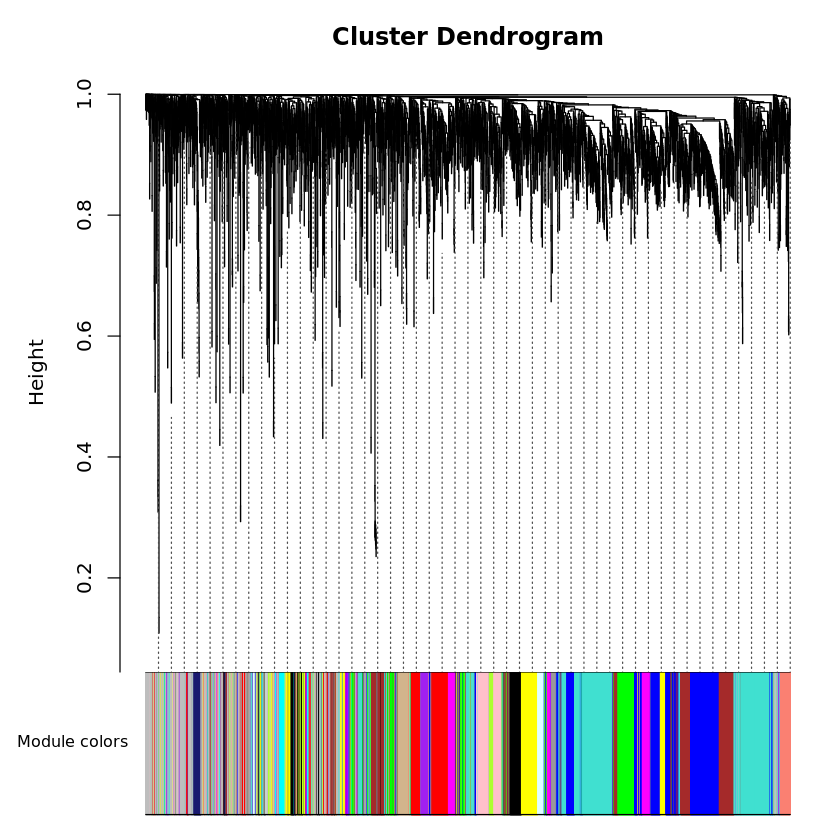

In [9]:
# Convert labels to colors for plotting
mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [10]:
moduleLabels = net$colors
moduleColors = labels2colors(net$colors)
MEs = net$MEs;
geneTree = net$dendrograms[[1]];
save(MEs, moduleLabels, moduleColors, geneTree,
file = "WGCNA-networkConstruction-auto.RData")

In [11]:
write.csv(moduleLabels, 'gene_module.csv')